## Welcome to the airport climatology tutorial!

<img align="center" width="800" src="https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2019/11/931/524/RT-Lightning.jpg?ve=1&tl=1">

### This tutorial will explore the occurrence of deep convection (thunderstorms) at airport sites using 10 years of data from ERA5 reanalysis and weather radar, and also look into the strengths of radar observations. Why is this relevant for airports?

<img align="center" width="800" src="https://www.bne.com.au/sites/default/files/BAC3747-Thunderstorm%20Infographic%20Animation%201140x1325px%20v1.gif">

As you can see, when there is a thunderstorm within a 10 nautical mile radius of an airport, an warning alert is triggered, and when a thunderstorm is within 5 nautical miles, airport ground operations are suspended.

Ideally, airports should be constructed in areas that minimise the impact of adverse weather. Severe weather not only impacts the safety of airport staff and passengers, suspended operations can cost airports and airlines many tens of millions per year. Ever had a flight delayed or cancelled due to weather? It can cost you a lot of time and effort too! For thunderstorms, airports and airlines could potentially optimise operations with extra contingencies during climatological peaks activity.

<img align="center" width="800" src="https://www.telegraph.co.uk/content/dam/films/2016/12/12/the-terminal-main_trans_NvBQzQNjv4BqOjwtMIBfBvsmIG0UzgZgYPhrltaUY50V0um6z1LiQa0.jpg?imwidth=1400">

The following tutorial will explore the thunderstorm climatology for Melbourne, Brisbane and Sydney Airports, and the new Western Sydney airport location. This will be achieved using 10 year datasets (2009 - 2018) of environmental reanalysis (ERA5) and observations (weather radar).

<img align="center" width="500" src="img/airport_table.png">

---

### Dataset overview

From [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview) we'll be using Convective Rain rate (CRR) and Convective Available Potential Energy (CAPE). Both are single level data and were downloaded at a 3hrly resolution for the native grid resolution (31 km).

- CRR (kg m-2 s-1): rate of rainfall at the earths surface generated by the convection scheme in the ECMWF at the specified time. The convection scheme represents convection at spatial scales smaller than the grid box. This parameter is the rate the rainfall would have if it were spread evenly over the grid box. Care should be taken when comparing model parameters with observations, because observations are often local to a particular point in space and time, rather than representing averages over a model grid box.

- CAPE (J kg-1): This is an indication of the instability (or stability) of the atmosphere and can be used to assess the potential for the development of convection, which can lead to heavy rainfall, thunderstorms and other severe weather. For ERA5, the CAPE value is the maximum calculated from low level.

From weather radar we'll be using Cartesian gridded (1x1 km) echo top heights (ETH) and 2.5 km reflectivity (REF) from the level 2 products of the [Australian Open Radar Dataset](http://openradar.io)

- ETH (m): Represents the height of the 0 dBZ level at the top of a precipitation echo. For us, this relates to the depth of the thunderstorm system, which intern relates to the intensity of convection and the larger scale environment. [Link](https://journals.ametsoc.org/doi/pdf/10.1175/WAF-D-12-00084.1) to algorithm.

- REF (dBZ): Gridded reflectivity at an altitude of 2.5 km above mean sea level

---

Before this can be done, we will first run over the preprocessing of these datasets. Preprocessing is essential here as we only need a tiny subset (only a few MB) from many tens of GB of underlying data.

Maximum ETH and REF values within 5 nautical mile radius of airport sites will be used to provide a 'ground truth' of suspended operations. From ERA5, we'll use the nearest grid to the airport location.  It's important to remember though that when using the 5 nautical mile, we may only be sampling a portion of a thunderstorm, rather than the entire storm (so not the true maximum intensity).

First, jump to the preprocessing [ERA5 processing script](./preprocessing_scripts/preprocess_era5.ipynb)

Second, jump to the preprocessing [Weather radar processing script](./preprocessing_scripts/preprocess_radar.ipynb)

---

After looking at the preprocessing scripts we can now start the analysis!

Let's first reflect on what we're trying to achieve:
- The primary objective of this analysis is to develop a climatological understanding thunderstorm occurrence and thunderstorm environments.

- The second objective is to understand the limitations when using reanalysis data as an indicator for thunderstorm activity.

In [1]:
#import ususal suspects for data analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#define which airports to investigate
airport_name_list = ['MEL','SYD','WSYD','BNE']
number_airports = len(airport_name_list)

First let's look at the time-series from both the weather radar and ERA5 datasets.

Since we have two variables for each dataset, we can use a twin-x (common x) plot to overlay both variables for inspection.

/home/meso/miniconda3/envs/radar-dev/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


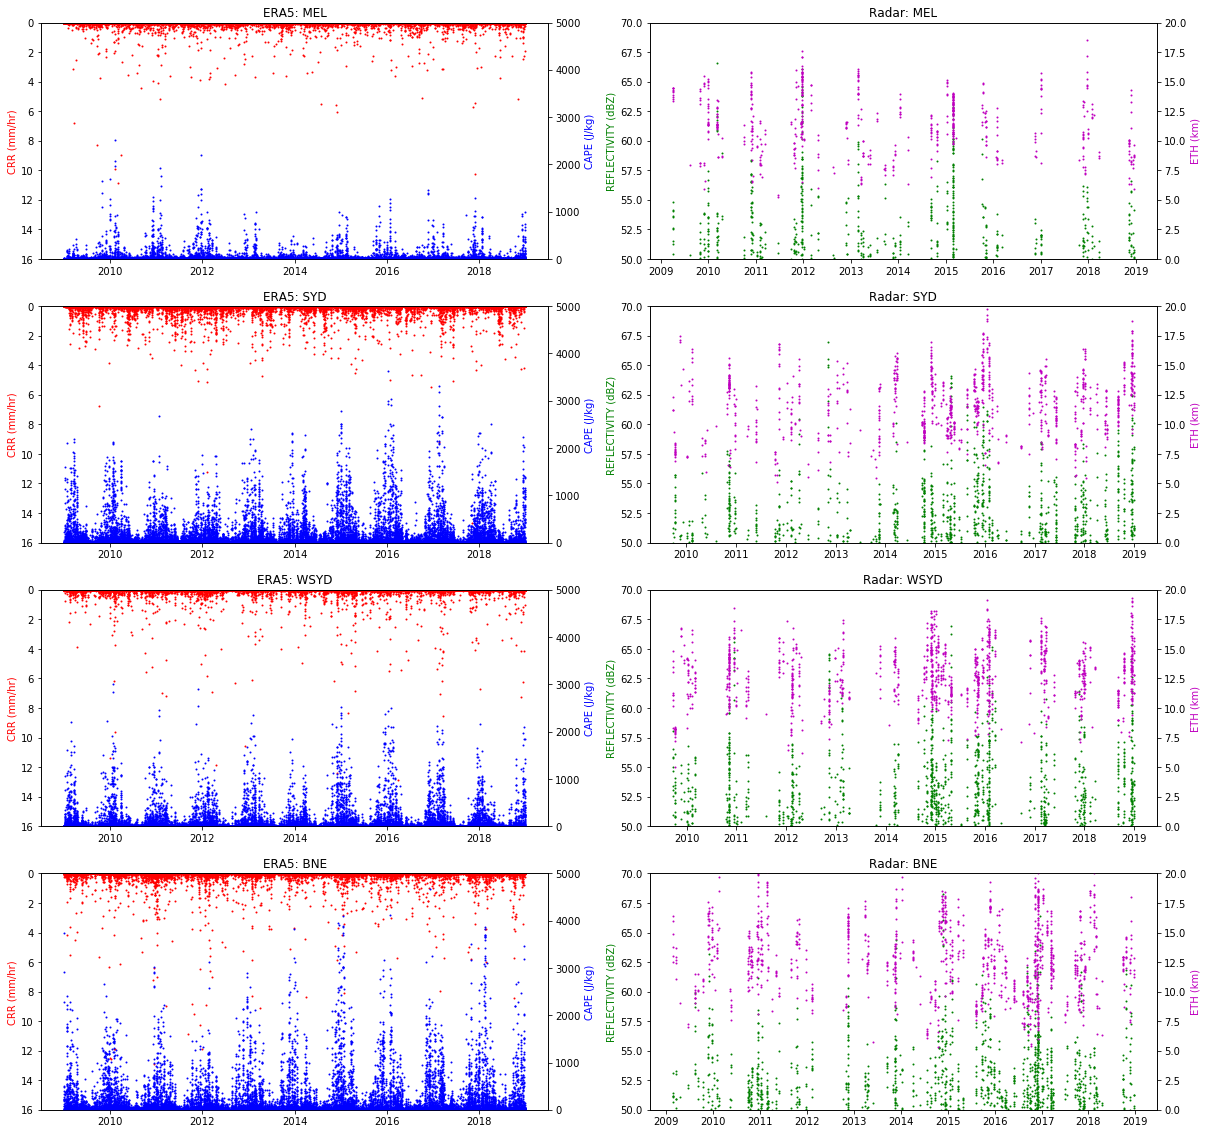

In [3]:
#create figure/axes for plotting with 2 columns and n rows
fig, axes = plt.subplots(nrows=number_airports, ncols=2, figsize=(20, 5*number_airports))

#generate
for i, airport_name in enumerate(airport_name_list):
    
    #load preprocessed data from numpyz files for both ERA5 and Weather radar
    with np.load('preprocessed_data/{name}_era5.npz'.format(name=airport_name)) as era_dict:
        era5_time = era_dict['era5_time']
        era5_crr  = era_dict['era5_crr']*60*60 #crr is in units of mm/s (kg/m2/s)
        era5_cape = era_dict['era5_cape']
    with np.load('preprocessed_data/{name}_radar.npz'.format(name=airport_name)) as radar_dict:
        radar_time = radar_dict['radar_time']
        radar_ref  = radar_dict['radar_ref']
        radar_eth  = radar_dict['radar_eth']
        
    #plot ERA5 data
    #create twinx axes
    ax1 = axes[i,0]
    ax2 = ax1.twinx()
    #plot data as scatter
    ax1.plot(era5_time, era5_crr, 'r.', ms=2) 
    ax2.plot(era5_time, era5_cape, 'b.', ms=2)
    #annotations
    ax1.set_ylabel('CRR (mm/hr)', color='r')
    ax2.set_ylabel('CAPE (J/kg)', color='b')
    ax1.set_ylim((16,0))
    ax2.set_ylim((0,5000))
    ax1.set_title('ERA5: ' + airport_name)
    
    
    #plot radar data
    #create twinx axes
    ax1 = axes[i,1]
    ax2 = ax1.twinx()
    #plot data as scatter
    ax1.plot(radar_time, radar_ref, 'g.', ms=2)
    ax2.plot(radar_time, radar_eth/1000, 'm.', ms=2)
    #annotations
    ax1.set_ylabel('REFLECTIVITY (dBZ)', color='g')
    ax2.set_ylabel('ETH (km)', color='m')
    ax1.set_ylim((50,70))
    ax2.set_ylim((0,20))
    ax1.set_title('Radar: ' + airport_name)

In both the ERA5 and weather radar datasets there are clear seasonal cycles of increased convective activity at all four airport locations.

Time for a quick discussion: How does the relative trends of convection (reflectivity, and echo tops) and the environment (CAPE) relate to our general understanding of Australian weather and climate? Any surprises?

---

### Monthly and Hourly Climatology

Now let's look at the mean hourly and monthly plots to better understand these trends at each airport site.

Here we can use some clever tricks from the _pandas_ library to group the data by different units of time, apply statistics and plot... all in one line!

Again, we'll use a twin axis to overlay both variables from each dataset

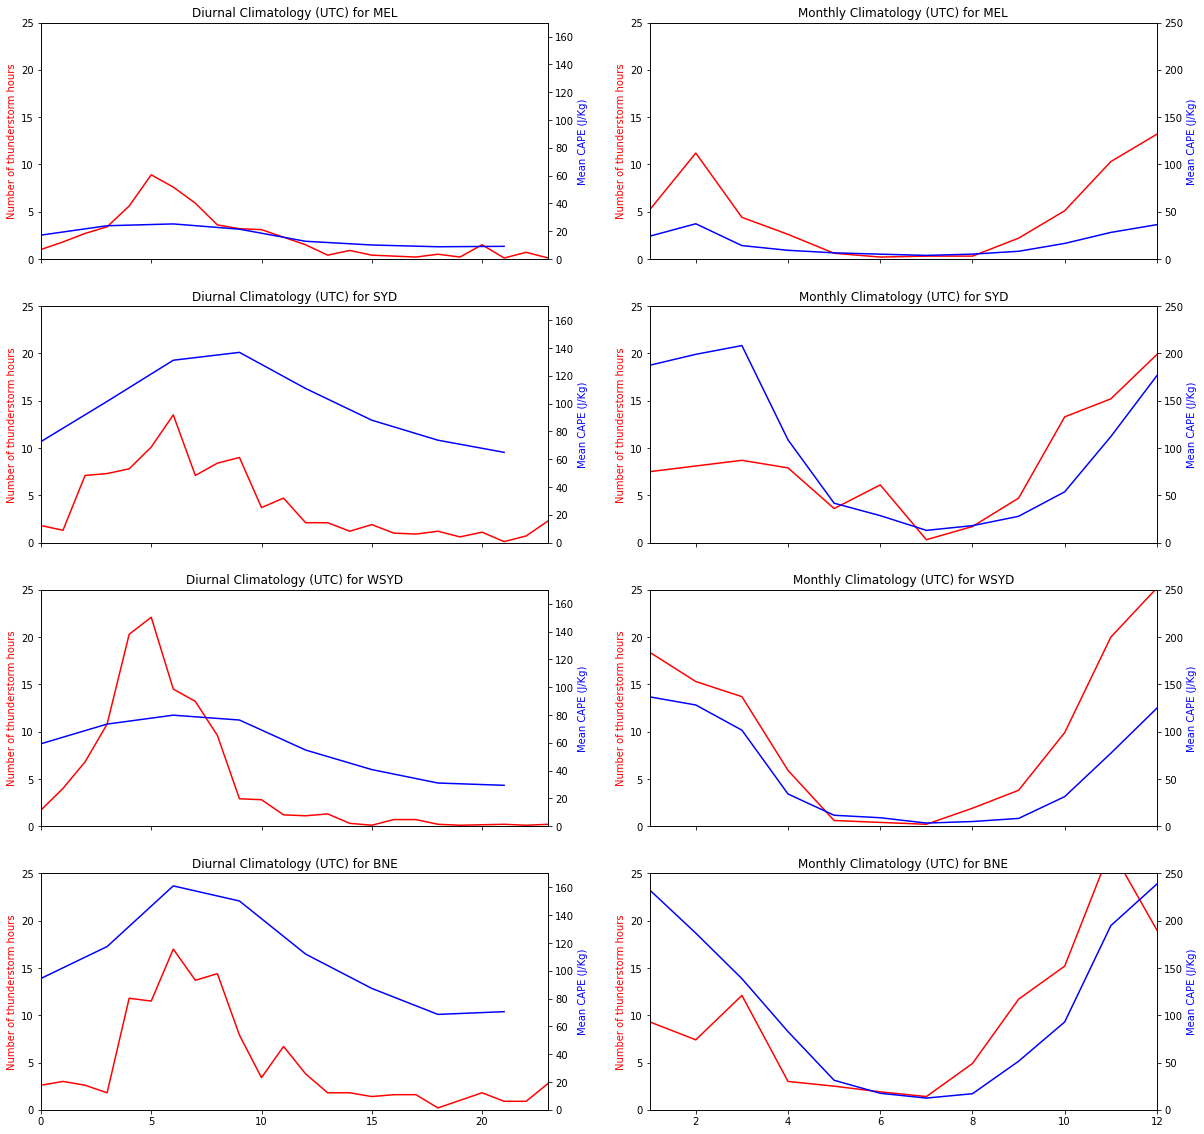

In [4]:
#create figure/axes for plotting with 2 columns and n rows
fig, axes = plt.subplots(nrows=number_airports, ncols=2, figsize=(20, 5*number_airports))

radar_volume_time = 0.1 #number of hours per radar sample (used to transform a count into hours)

#looping through each airport
for i, airport_name in enumerate(airport_name_list):
    
    #load preprocessed data from numpyz files for both ERA5 and Weather radar
    with np.load('preprocessed_data/{name}_era5.npz'.format(name=airport_name)) as era_dict:
        era5_time = era_dict['era5_time']
        era5_crr  = era_dict['era5_crr']*60*60 #crr is in units of mm/s (kg/m2/s)
        era5_cape = era_dict['era5_cape']
    with np.load('preprocessed_data/{name}_radar.npz'.format(name=airport_name)) as radar_dict:
        radar_time = radar_dict['radar_time']
        radar_eth  = radar_dict['radar_eth']
        radar_ref  = radar_dict['radar_ref']

    #build panda dataframes for era5 and weather radar datasets
    radar_df = pd.DataFrame({'ref':radar_ref, 'eth':radar_eth, 'time':radar_time})
    era_df = pd.DataFrame({'crr':era5_crr, 'cape':era5_cape, 'time':era5_time})
    
    
    #Diurnal Climatology
    #create twin axes
    ax1 = axes[i,0]
    ax2 = ax1.twinx()
    #for our weather radar data
    #use pandas groupby functionality for hours, apply a count to each group, rescale count to compute hours, and plot
    radar_df.groupby(radar_df['time'].dt.hour)['ref'].count().mul(radar_volume_time).plot(style='r', ax=ax1)
    #for our era5 data
    #use pandas groupby functionality for hours, apply a mean to each group and plot
    era_df.groupby(era_df['time'].dt.hour)['cape'].mean().plot(style='b', ax=ax2)
    #plot annotations
    ax1.set_title('Diurnal Climatology (UTC) for ' + airport_name)
    ax1.set_xlabel('')
    ax1.set_ylabel('Number of thunderstorm hours', color='r')
    ax2.set_ylabel('Mean CAPE (J/Kg)', color='b')
    ax1.set_xlim((0,23))
    ax1.set_ylim((0,25))
    ax2.set_ylim((0,170))
    
    #Monthly Climatology (same as above, but using groupby month)
    ax1 = axes[i,1]
    ax2 = ax1.twinx()
    radar_df.groupby(radar_df['time'].dt.month)['ref'].count().mul(radar_volume_time).plot(style='r', ax=ax1)
    era_df.groupby(era_df['time'].dt.month)['cape'].mean().plot(style='b', ax=ax2)
    ax1.set_title('Monthly Climatology (UTC) for ' + airport_name)
    ax1.set_xlabel('')
    ax1.set_ylabel('Number of thunderstorm hours', color='r')
    ax2.set_ylabel('Mean CAPE (J/Kg)', color='b')
    ax1.set_xlim((1,12))
    ax1.set_ylim((0,25))
    ax2.set_ylim((0,250))

The climatologies of thunderstorm frequency and mean CAPE for months and hours are evidently correlated. However, remember that we are using all data in ERA5, rather than just data when thunderstorms were present at the airport location. We'll get back to this problem later.

Discussion: For the new Western Sydney site, comment on how the impact of thunderstorm activity and environments are different to Sydney (Mascot)?

---

__Task 1:__
Now repeat this analysis for convective rain rate (crr, era5). How do these variables compare?

In [5]:
## use this cell. Start by copying from the python cell above

### Relationship between ERA5 variables and thunderstorm properties

Now let's resample the weather radar data to the 3hrly ERA5 timesteps, subset the ERA5 data to only include periods with radar-observed thunderstorms and explore the correlation between CAPE and ETH.

Again, we can use pandas to resample and plot our radar data.

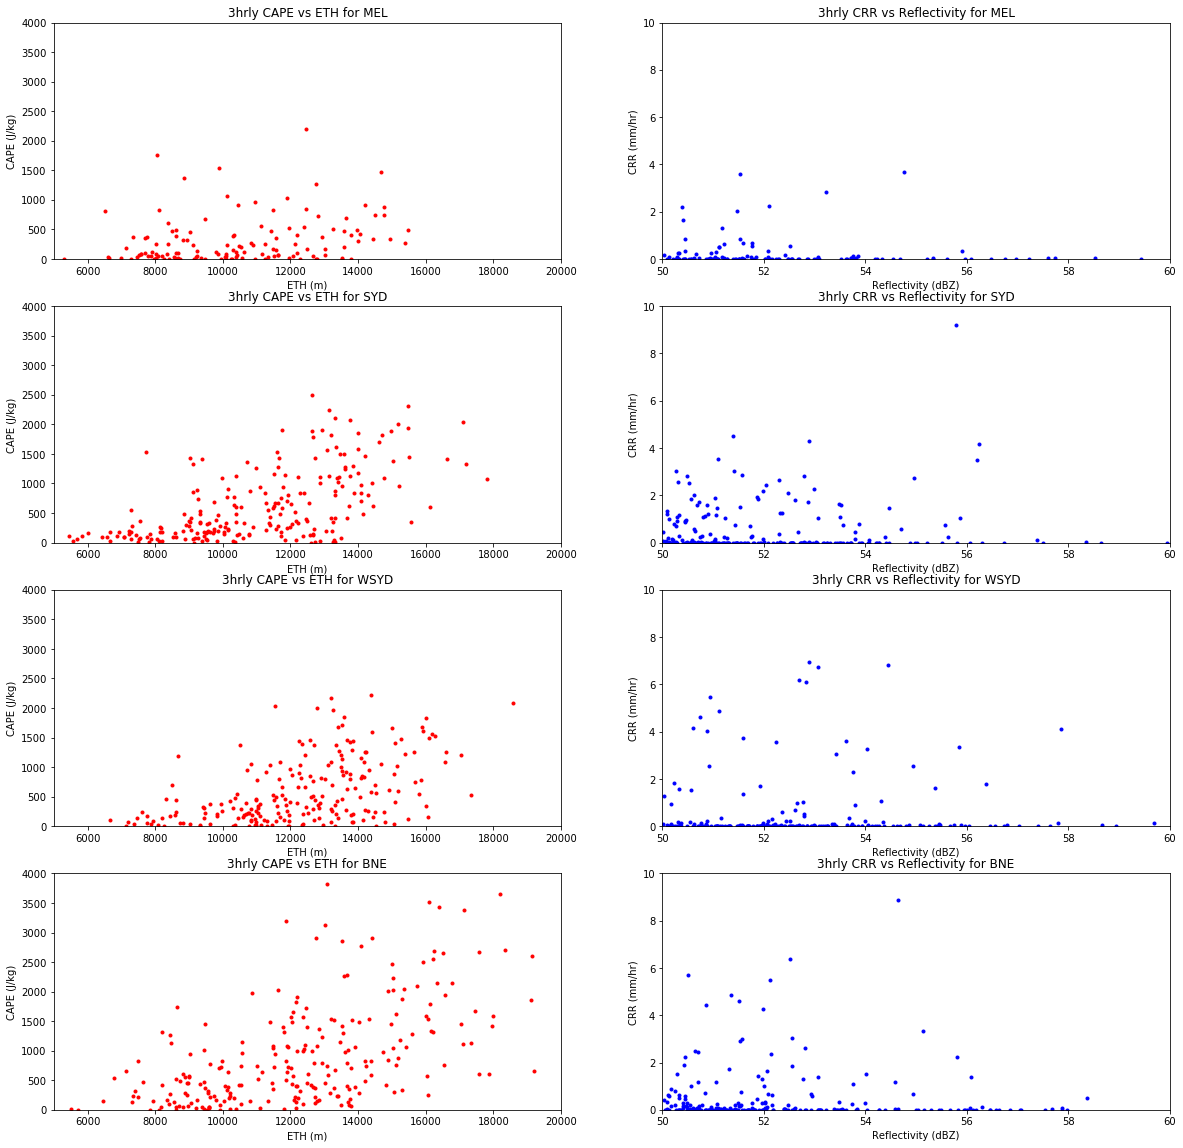

In [6]:
#create figure/axes for plotting with 2 columns and n rows
fig, axes = plt.subplots(nrows=number_airports, ncols=2, figsize=(20, 5*number_airports))

for i, airport_name in enumerate(airport_name_list):
    
    #load preprocessed data from numpyz files for both ERA5 and Weather radar
    with np.load('preprocessed_data/{name}_era5.npz'.format(name=airport_name)) as era_dict:
        era5_time = era_dict['era5_time']
        era5_crr  = era_dict['era5_crr']*60*60 #crr is in units of mm/s (kg/m2/s)
        era5_cape = era_dict['era5_cape']
    with np.load('preprocessed_data/{name}_radar.npz'.format(name=airport_name)) as radar_dict:
        radar_time = radar_dict['radar_time']
        radar_ref  = radar_dict['radar_ref']
        radar_eth  = radar_dict['radar_eth']


    #first, we need to pad our data to the time range of the era5 data
    radar_time_pad = np.concatenate(([era5_time[0]], radar_time, [era5_time[-1]]))
    radar_ref_pad = np.concatenate(([np.nan], radar_ref, [np.nan]))
    radar_eth_pad = np.concatenate(([np.nan], radar_eth, [np.nan]))

    #second, we need to create a pandas dataframe of our radar data
    radar_df = pd.DataFrame({'ref':radar_ref_pad, 'eth':radar_eth_pad},    # values
                        index=radar_time_pad)  #index

    #now we can resample to 3hourly intervals
    radar_df_3hr = radar_df.resample('3H').mean()

    #and convert back to numpy arrays for generating a scatter plot of the two datasets
    radar_ref_3hrly = radar_df_3hr['ref'][:]
    radar_eth_3hrly = radar_df_3hr['eth'][:]
    radar_time_3hrly = radar_df_3hr.index

    #plot CAPE vs ETH
    axes[i,0].plot(radar_eth_3hrly,era5_cape, 'r.')
    axes[i,0].set_title('3hrly CAPE vs ETH for ' + airport_name)
    axes[i,0].set_xlabel('ETH (m)')
    axes[i,0].set_ylabel('CAPE (J/kg)')
    axes[i,0].set_xlim((5000,20000))
    axes[i,0].set_ylim((0, 4000))
    
    #plot REF vs CRR
    axes[i,1].plot(radar_ref_3hrly,era5_crr, 'b.')
    axes[i,1].set_title('3hrly CRR vs Reflectivity for ' + airport_name)
    axes[i,1].set_xlabel('Reflectivity (dBZ)')
    axes[i,1].set_ylabel('CRR (mm/hr)')
    axes[i,1].set_xlim((50, 60))
    axes[i,1].set_ylim((0, 10))

### Time to reflect!

Clearly it's challenging for the reanalysis model to correctly represent the thunderstorm environments for our airports. This relates to the complex physical setting, low spatial resolution of the reanalysis, spatial representation, errors in the model’s parameterisation of processes that preconditions/trigger thunderstorms. While the direct correlation is poor, it can still be used as an indicator for thunderstorm potential/severity, especially through the utilisation of more parameters. For example, see [Allen and Karoly 2014](https://rmets.onlinelibrary.wiley.com/doi/pdf/10.1002/joc.3667) or [Taszarek et al. 2018](https://journals.ametsoc.org/doi/pdf/10.1175/JCLI-D-18-0372.1)

---

## Environments vs Observations

Finally, lets take a look at the occurrence of high CAPE (defined as greater than 1000) and the occurrence of thunderstorms (reflectivity) to better understand the difference between potential thunderstorm environments and observations of thunderstorms.

In [7]:
cape_threshold = 1000

#for each airport
for i, airport_name in enumerate(airport_name_list):
    #load preprocessed data from numpyz files for both ERA5 and Weather radar
    with np.load('preprocessed_data/{name}_era5.npz'.format(name=airport_name)) as era_dict:
        era5_time = era_dict['era5_time']
        era5_crr  = era_dict['era5_crr']*60*60 #crr is in units of mm/s (kg/m2/s)
        era5_cape = era_dict['era5_cape']
    with np.load('preprocessed_data/{name}_radar.npz'.format(name=airport_name)) as radar_dict:
        radar_time = radar_dict['radar_time']
        radar_ref  = radar_dict['radar_ref']
        radar_eth  = radar_dict['radar_eth']

    #first, we need to pad our data to the time range of the era5 data
    radar_time_pad = np.concatenate(([era5_time[0]], radar_time, [era5_time[-1]]))
    radar_ref_pad = np.concatenate(([np.nan], radar_ref, [np.nan]))
    radar_eth_pad = np.concatenate(([np.nan], radar_eth, [np.nan]))

    #second, we need to create a pandas dataframe of our radar data
    radar_df = pd.DataFrame({'ref':radar_ref_pad, 'eth':radar_eth_pad},    # values
                        index=radar_time_pad)  #index

    #now we can resample to 3hourly intervals
    radar_df_3hr = radar_df.resample('3H').mean()


    #and convert back to numpy arrays
    radar_ref_3hrly = radar_df_3hr['ref'][:]
    radar_eth_3hrly = radar_df_3hr['eth'][:]
    radar_time_3hrly = radar_df_3hr.index

    #count the number of data points where cape exceeds 1000 J/Kg and convection is absent/present
    cape_nostorms_count = np.sum(np.logical_and(era5_cape > cape_threshold, np.isnan(radar_ref_3hrly)))
    cape_storms_count = np.sum(np.logical_and(era5_cape > cape_threshold, ~np.isnan(radar_ref_3hrly)))
    
    #print results
    print('for ', airport_name)
    print('number of data points with CAPE > 1000, but no storms:', cape_nostorms_count)
    print('number of data points with CAPE > 1000 and storms:', cape_storms_count)
    print('')

for  MEL
number of data points with CAPE > 1000, but no storms: 28
number of data points with CAPE > 1000 and storms: 8

for  SYD
number of data points with CAPE > 1000, but no storms: 565
number of data points with CAPE > 1000 and storms: 56

for  WSYD
number of data points with CAPE > 1000, but no storms: 262
number of data points with CAPE > 1000 and storms: 52

for  BNE
number of data points with CAPE > 1000, but no storms: 722
number of data points with CAPE > 1000 and storms: 88



---

__Task 2:__ add some statistics (e.g., POD/FAR) to find a more optimal threshold for CAPE for reducing false alarms and increasing probability of detection


> POD = A/(A+B)

> FAR = C/(A+C)

> where: A is the number of storm environments that a storm would occur when it subsequently did occur (forecast = yes, observation = yes), B is the number of environments indicating no storms when storms did occurred (no, yes), and C is the number of storm environments when storms did not occur (yes, no)



In [8]:
## use this cell for task 2


The next step for this analysis could be testing more effective environmental parameters against weather radar data, sourcing airport traffic projections and looking at the impacts of a changing climate on airport operations using CIMP5/6. Consideration is also required for missing weather radar datasets! With improved environmental parameters, the ERA5 dataset also value for looking at changes in thunderstorm activity for airports over the last 40 years.

## Questions/Comments?

---

Extra section if time permits: Looking at mean statistics of cloud top heights from weather radar.

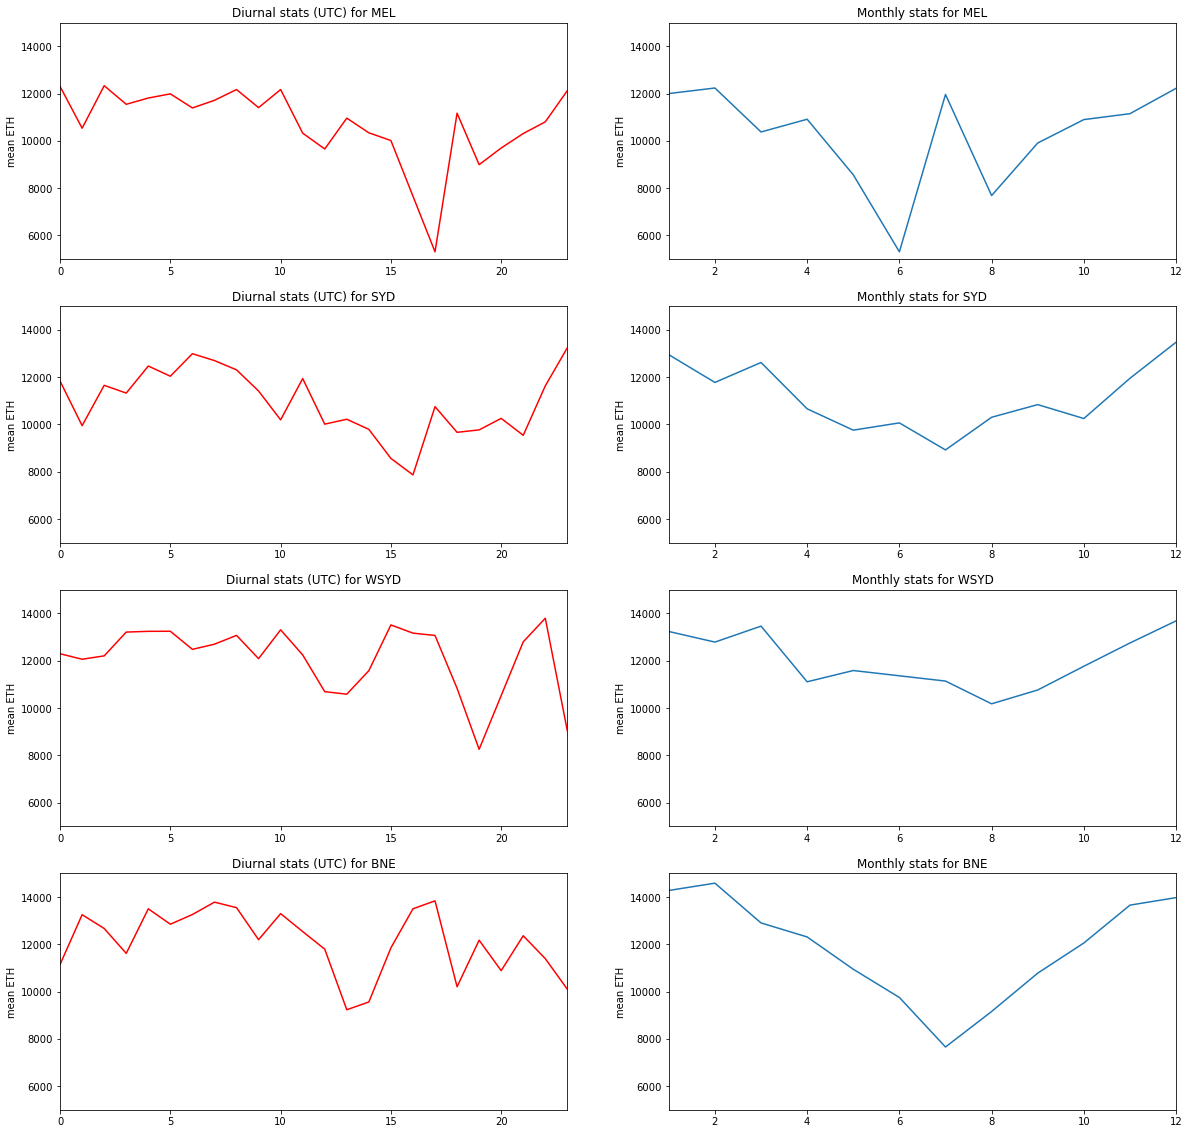

In [9]:
#create figure/axes for plotting with 2 columns and n rows
fig, axes = plt.subplots(nrows=number_airports, ncols=2, figsize=(20, 5*number_airports))

for i, airport_name in enumerate(airport_name_list):
    
    #load preprocessed data from numpyz files for both ERA5 and Weather radar
    with np.load('preprocessed_data/{name}_radar.npz'.format(name=airport_name)) as radar_dict:
        radar_time = radar_dict['radar_time']
        radar_eth  = radar_dict['radar_eth']
        radar_ref  = radar_dict['radar_ref']

    radar_df = pd.DataFrame({'ref':radar_ref, 'eth':radar_eth, 'time':radar_time})  #index
    
    radar_df.groupby(radar_df['time'].dt.hour)['eth'].mean().plot(style='r', ax=axes[i,0])
    axes[i,0].set_title('Diurnal stats (UTC) for ' + airport_name)
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('mean ETH')
    axes[i,0].set_xlim((0,23))
    axes[i,0].set_ylim((5000,15000))
    
    radar_df.groupby(radar_df['time'].dt.month)['eth'].mean().plot(ax=axes[i,1])
    axes[i,1].set_title('Monthly stats for ' + airport_name)
    axes[i,1].set_xlabel('')
    axes[i,1].set_ylabel('mean ETH')
    axes[i,1].set_xlim((1,12))
    axes[i,1].set_ylim((5000,15000))